<a href="https://colab.research.google.com/github/Center-for-Health-Data-Science/IntroToML/blob/main/DataViz_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running code in google colab

In this exercise, we want to learn to how run code in Google colab. All of you who have used a ipython or jupyter notebook should breeze through this. If not, then we will learn this together. Google colab lets one run a python notebook with all the dependencies without having to install any dependencies, have a machine that can support the packages etc. In addition to running python commands, we can also run bash commands. 

First let us try and run some bash commands.  

In [ ]:
%%bash
pwd 
ls

To run python commands, we can just use python commands in the code block. 

In [2]:
# packages needed for the exercise.
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Data exploration
First, let us get some data that we can use.  

In [8]:
%%bash
rm -f gtex_1000.csv.gz*
wget https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz
ls

gtex_1000.csv.gz
sample_data


--2022-05-22 21:11:27--  https://github.com/Center-for-Health-Data-Science/IntroToML/raw/main/data/gtex_1000.csv.gz
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz [following]
--2022-05-22 21:11:27--  https://raw.githubusercontent.com/Center-for-Health-Data-Science/IntroToML/main/data/gtex_1000.csv.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9481366 (9.0M) [application/octet-stream]
Saving to: ‘gtex_1000.csv.gz’

     0K .......... .......... .......... .......... ..........  0% 6.87M 1s
    50K .......... .......... ....

## Visualing the data

Now, let us first load the data, and then see if we can visualize some aspects of it. The data contains the gene expression for 1000 genes in 7 tissues, from the GTEx project. Then, look at the data - so ugly and unhandy :(

In [9]:
gtex_rnaseq = pd.read_table("gtex_1000.csv.gz",sep='\t')
gtex_rnaseq

,ENSG00000122591.11,ENSG00000110934.10,ENSG00000112303.13,ENSG00000243943.9,ENSG00000200320.1,ENSG00000185523.6,ENSG00000002016.17,ENSG00000196290.14,ENSG00000171824.13,ENSG00000115459.17,...,ENSG00000180011.6,ENSG00000164124.10,ENSG00000244734.3,ENSG00000187581.2,ENSG00000213339.8,ENSG00000130165.10,ENSG00000005801.16,ENSG00000185915.5,ENSG00000144560.14,tissue
0,405969,7207,1849,76326,1137,0,57752,48599,283994,103733,...,327448,5471,18465,350,168016,132203,77422,155460,166033,Muscle - Skeletal
1,110743,4954,4145,59331,1421,0,44751,47289,130585,80527,...,302126,9517,534500,912,84383,36860,70953,22257,119196,Muscle - Skeletal
2,601549,5079,4575,122535,1548,0,74709,88950,382542,292433,...,270768,12160,176390,447,103221,206666,138026,80034,140739,Muscle - Skeletal
3,107785,4251,992,48109,263,0,32903,61342,187242,103506,...,154879,3359,232653,223,57992,99642,55399,26447,34862,Muscle - Skeletal
4,104541,2725,1358,37434,793,0,123826,45624,276829,101146,...,246964,2494,518473,705,120504,111607,46009,227114,144601,Muscle - Skeletal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377,79761,19768,10206,156399,9039,208,122848,62718,314624,192105,...,195498,52029,734385,14,959388,229488,107154,123,329118,Pancreas
3378,20851,2991,2527,35698,2716,274,31757,21671,99782,59068,...,78579,17461,384240,0,338844,111479,44852,10,82292,Pancreas
3379,56853,8709,9006,93894,5211,0,64820,43218,176857,77350,...,140115,65180,3694,377,305473,112569,98811,267,197824,Pancreas
3380,52879,9946,6180,136779,7409,264,96992,35492,214014,127169,...,198793,54667,362916,228,557786,124295,111535,0,290844,Pancreas


## Plotting the *data*
Let us make some exploratory plots: we will make some distribution plots and scatter plots, to see if we can see some *patterns* in the data.

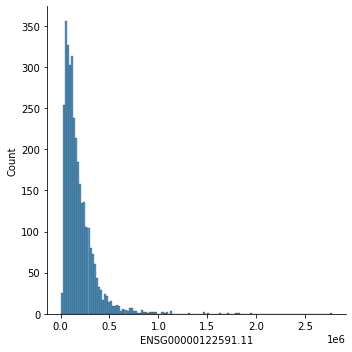

In [15]:
sns.displot(data=gtex_rnaseq, x="ENSG00000122591.11")

Let us now plot the expression of the same gene, but color the bars using the "tissue" type. 



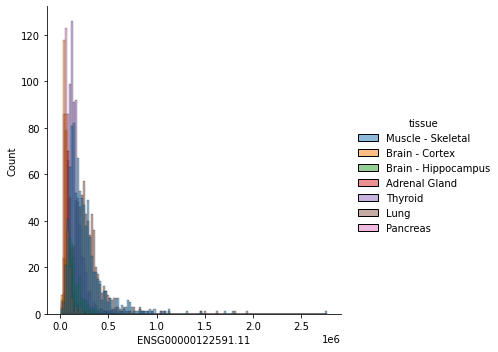

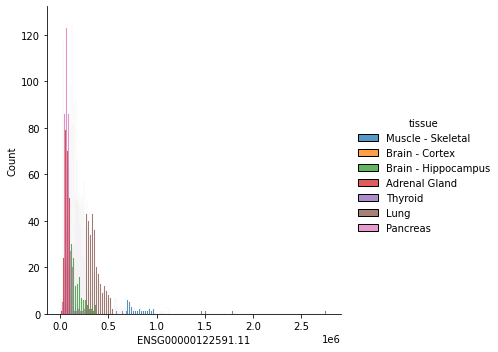

In [16]:
sns.displot(data=gtex_rnaseq, x="ENSG00000122591.11", hue="tissue")
sns.displot(data=gtex_rnaseq, x="ENSG00000122591.11", hue="tissue", multiple="dodge")


Now, let us see plot a scatter plot of the first 2 genes - for all tissues, and then we will do one for each tissue. 

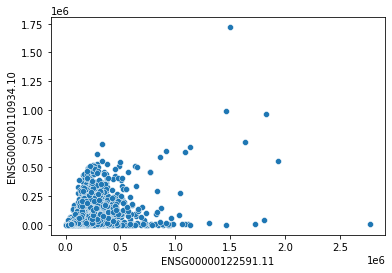

In [17]:
sns.scatterplot(data=gtex_rnaseq, x="ENSG00000122591.11", y="ENSG00000110934.10")

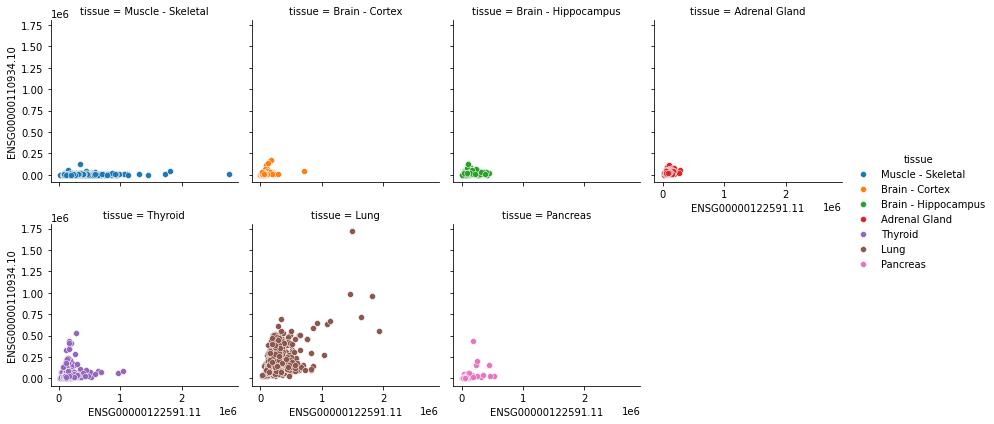

In [18]:
grid = sns.FacetGrid(gtex_rnaseq, col = "tissue", hue = "tissue", col_wrap=4)
grid.map(sns.scatterplot, "ENSG00000122591.11", "ENSG00000110934.10")

grid.add_legend()


# What next?
Sure, exploratory analyses and plots are great - esp. when you have a small dataset. But can you imagine trying to do this for this whole dataset? And this dataset is only a small fraction of the full GTEx data. This is where learning methods come into play!